In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import LinearConstraint, milp

In [84]:
df_of = pd.read_csv("various_PD_for_offering.csv")

In [3]:
df_of

,index,AMT_CREDIT,AMT_ANNUITY,PD_slgb,PD_sllg,PD_slrf,PD_lgbm,PD_sllg_sigm,PD_sllg_isot,PD_slgb_sigm,PD_slgb_isot,PD_slrf_sigm,PD_slrf_isot,PD_lgbm_sigm,PD_lgbm_isot
0,237427,1288350.0,37800.0,0.386264,0.831630,0.284103,0.490785,0.822039,0.760956,0.393567,0.416742,0.256567,0.265968,0.497509,0.486567
1,284232,206280.0,7906.5,0.309983,0.347804,0.327660,0.322922,0.347433,0.364253,0.309500,0.307412,0.403485,0.439425,0.296218,0.300346
2,163322,402948.0,42444.0,0.408876,0.868559,0.330332,0.509348,0.859692,0.760956,0.418561,0.416742,0.413455,0.444992,0.521144,0.517500
3,1270,1350000.0,37255.5,0.118807,0.276147,0.232589,0.093268,0.277789,0.269287,0.106815,0.096743,0.134736,0.131475,0.115510,0.088811
4,206258,472500.0,33016.5,0.167294,0.313881,0.215751,0.164196,0.314499,0.300699,0.156322,0.166875,0.107182,0.116279,0.157863,0.156716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,184935,1350000.0,51552.0,0.187789,0.074170,0.228138,0.100612,0.077967,0.068930,0.177755,0.166875,0.126918,0.131475,0.119389,0.088811
304,157528,2254500.0,56992.5,0.077219,0.071844,0.212314,0.062961,0.075601,0.068930,0.066156,0.049774,0.102206,0.105873,0.100644,0.056122
305,56206,573628.5,22878.0,0.279436,0.314265,0.310952,0.248261,0.314872,0.300699,0.276099,0.274306,0.343195,0.347506,0.223423,0.271654
306,84602,284400.0,13257.0,0.303946,0.393571,0.294436,0.312479,0.391806,0.420016,0.302882,0.307412,0.288179,0.265968,0.285246,0.300346


In [ ]:
df_of['Risk'] = np.round(df_of['AMT_CREDIT']*np.power(df_of['PD_raw'], 1.5), 1)
df_of

In [90]:
PD_cols = df_of.columns[3:]

In [91]:
for col in PD_cols:
    df_of[col+'_Risk'] = np.round(df_of['AMT_CREDIT']*np.power(df_of[col], 1.5), 1)

In [7]:
df_of

,index,AMT_CREDIT,AMT_ANNUITY,PD_slgb,PD_sllg,PD_slrf,PD_lgbm,PD_sllg_sigm,PD_sllg_isot,PD_slgb_sigm,...,PD_slrf_Risk,PD_lgbm_Risk,PD_sllg_sigm_Risk,PD_sllg_isot_Risk,PD_slgb_sigm_Risk,PD_slgb_isot_Risk,PD_slrf_sigm_Risk,PD_slrf_isot_Risk,PD_lgbm_sigm_Risk,PD_lgbm_isot_Risk
0,237427,1288350.0,37800.0,0.386264,0.831630,0.284103,0.490785,0.822039,0.760956,0.393567,...,195095.2,442966.7,960224.7,855211.1,318098.1,346605.6,167430.4,176716.4,452100.5,437268.4
1,284232,206280.0,7906.5,0.309983,0.347804,0.327660,0.322922,0.347433,0.364253,0.309500,...,38689.5,37853.2,42243.9,45348.5,35517.9,35159.1,52868.7,60087.5,33256.3,33953.9
2,163322,402948.0,42444.0,0.408876,0.868559,0.330332,0.509348,0.859692,0.760956,0.418561,...,76502.2,146477.4,321191.2,267478.3,109115.7,108405.3,107125.2,119612.6,151595.3,150008.0
3,1270,1350000.0,37255.5,0.118807,0.276147,0.232589,0.093268,0.277789,0.269287,0.106815,...,151432.2,38453.2,197654.2,188649.8,47128.6,40622.4,66766.6,64357.5,52998.5,35730.2
4,206258,472500.0,33016.5,0.167294,0.313881,0.215751,0.164196,0.314499,0.300699,0.156322,...,47351.2,31437.4,83335.4,77911.3,29203.2,32209.9,16580.1,18735.0,29636.3,29313.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,184935,1350000.0,51552.0,0.187789,0.074170,0.228138,0.100612,0.077967,0.068930,0.177755,...,147105.8,43083.3,29389.8,24431.3,101173.1,92028.4,61040.7,64357.5,55690.4,35730.2
304,157528,2254500.0,56992.5,0.077219,0.071844,0.212314,0.062961,0.075601,0.068930,0.066156,...,220556.0,35617.3,46864.6,40800.3,38362.3,25035.2,73666.1,77665.1,71983.2,29974.7
305,56206,573628.5,22878.0,0.279436,0.314265,0.310952,0.248261,0.314872,0.300699,0.276099,...,99465.2,70956.9,101352.0,94586.5,83220.0,82410.5,115329.7,117509.9,60579.0,81218.3
306,84602,284400.0,13257.0,0.303946,0.393571,0.294436,0.312479,0.391806,0.420016,0.302882,...,45437.7,49677.5,69748.7,77415.5,47406.7,48474.2,43997.0,39009.7,43326.9,46812.6


In [93]:
Risk_cols = df_of.columns[-len(PD_cols):]

In [94]:
Risk_cols

Index(['PD_slgb_Risk', 'PD_sllg_Risk', 'PD_slrf_Risk', 'PD_lgbm_Risk',
       'PD_sllg_sigm_Risk', 'PD_sllg_isot_Risk', 'PD_slgb_sigm_Risk',
       'PD_slgb_isot_Risk', 'PD_slrf_sigm_Risk', 'PD_slrf_isot_Risk',
       'PD_lgbm_sigm_Risk', 'PD_lgbm_isot_Risk'],
      dtype='object')

In [95]:
import seaborn as sns

<Axes: >

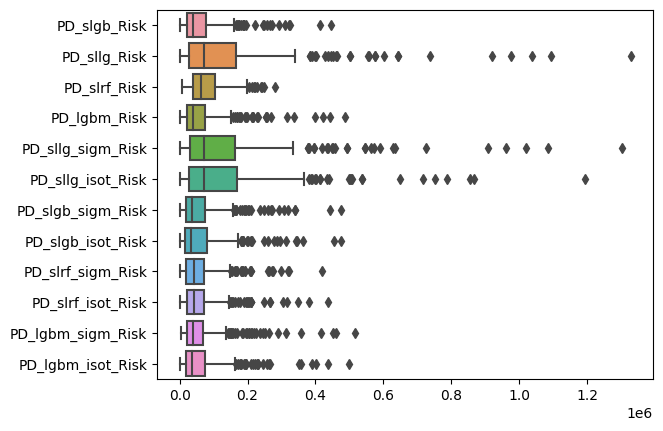

In [96]:
sns.boxplot(data=df_of[Risk_cols], orient='h')

In [43]:
def run_mlip(df, risk_col):
    ia = np.array(df['AMT_ANNUITY'])
    r = np.array(df[risk_col])

    c = -ia

    A = np.identity(c.shape[0])
    b_l = np.zeros_like(c)
    b_u = np.ones_like(c)
    constraint_1 = LinearConstraint(A=A, lb=b_l, ub=b_u)
    constraint_2 = LinearConstraint(A=r, lb=0, ub=200000)

    integrality = np.ones_like(c)

    res = milp(c=c, constraints=[constraint_1, constraint_2], integrality=integrality)
    print(risk_col, res.message, res.status)
    
    x = res.x
    return (-c@x, r@x, sum(x))


In [25]:
import os

In [34]:
os.listdir()

['.ipynb_checkpoints',
 'markov_credit_scoring.pdf',
 'milp_offering.ipynb',
 'milp_profit_risk_res.csv',
 'various_PD_for_offering.csv',
 '~$диплом.docx',
 '~WRL1621.tmp',
 'Безымянный.png',
 'Безымянный2.png',
 'Безымянный3.png',
 'Безымянный4.png',
 'диплом.docx',
 'диплом.pdf',
 'Мыс.txt']

In [28]:
df_offering_result_dict = {"Risk_col": [], "Total_profit": [], "Total_risk": [], "Clients": []}

In [97]:
df_offering_result_dict = {"Risk_col": [], "Total_profit": [], "Total_risk": [], "Clients": []}

for col in Risk_cols:
    profit, risk, clients = run_mlip(df_of, col)
    df_offering_result_dict["Risk_col"].append(col)
    df_offering_result_dict["Total_profit"].append(profit)
    df_offering_result_dict["Total_risk"].append(risk)
    df_offering_result_dict["Clients"].append(clients)
    
df_offering_result = pd.DataFrame(df_offering_result_dict)
df_offering_result.to_csv("milp_profit_risk_res.csv")

PD_slgb_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slgb_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slgb_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0


In [86]:
df_offering_result

,Risk_col,Total_profit,Total_risk,Clients
0,PD_slgb,8164035.0,69.596591,308.0
1,PD_sllg,8164035.0,104.918773,308.0
2,PD_slrf,8164035.0,81.107418,308.0
3,PD_lgbm,8164035.0,68.916627,308.0
4,PD_slgb_sigm,8164035.0,68.103115,308.0
5,PD_slgb_isot,8164035.0,68.104061,308.0
6,PD_sllg_sigm,8164035.0,104.821405,308.0
7,PD_sllg_isot,8164035.0,103.286465,308.0
8,PD_slrf_sigm,8164035.0,68.172331,308.0
9,PD_slrf_isot,8164035.0,67.811513,308.0


In [31]:
df_offering_result.sort_values(by=['Total_profit'], ascending=False)

,Risk_col,Total_profit,Total_risk,Clients
7,PD_slgb_isot_Risk,928129.5,199790.5,30.0
11,PD_lgbm_isot_Risk,925222.5,199902.5,30.0
6,PD_slgb_sigm_Risk,732141.0,199655.0,25.0
3,PD_lgbm_Risk,716017.5,199997.7,24.0
0,PD_slgb_Risk,633357.0,199566.0,20.0
8,PD_slrf_sigm_Risk,569178.0,199219.3,23.0
9,PD_slrf_isot_Risk,564012.0,199852.1,19.0
5,PD_sllg_isot_Risk,551101.5,199380.1,26.0
1,PD_sllg_Risk,528714.0,199982.4,24.0
10,PD_lgbm_sigm_Risk,526423.5,198822.4,18.0


In [32]:
df_offering_result.sort_values(by=['Total_risk'], ascending=False)

,Risk_col,Total_profit,Total_risk,Clients
3,PD_lgbm_Risk,716017.5,199997.7,24.0
1,PD_sllg_Risk,528714.0,199982.4,24.0
11,PD_lgbm_isot_Risk,925222.5,199902.5,30.0
2,PD_slrf_Risk,220986.0,199863.6,7.0
9,PD_slrf_isot_Risk,564012.0,199852.1,19.0
7,PD_slgb_isot_Risk,928129.5,199790.5,30.0
4,PD_sllg_sigm_Risk,500125.5,199786.5,24.0
6,PD_slgb_sigm_Risk,732141.0,199655.0,25.0
0,PD_slgb_Risk,633357.0,199566.0,20.0
5,PD_sllg_isot_Risk,551101.5,199380.1,26.0


In [33]:
df_offering_result.sort_values(by=['Clients'], ascending=False)

,Risk_col,Total_profit,Total_risk,Clients
7,PD_slgb_isot_Risk,928129.5,199790.5,30.0
11,PD_lgbm_isot_Risk,925222.5,199902.5,30.0
5,PD_sllg_isot_Risk,551101.5,199380.1,26.0
6,PD_slgb_sigm_Risk,732141.0,199655.0,25.0
1,PD_sllg_Risk,528714.0,199982.4,24.0
3,PD_lgbm_Risk,716017.5,199997.7,24.0
4,PD_sllg_sigm_Risk,500125.5,199786.5,24.0
8,PD_slrf_sigm_Risk,569178.0,199219.3,23.0
0,PD_slgb_Risk,633357.0,199566.0,20.0
9,PD_slrf_isot_Risk,564012.0,199852.1,19.0


In [5]:
df_of = pd.read_csv("various_PD_for_offering(1).csv", index_col=0)

In [6]:
df_of

,AMT_CREDIT,AMT_ANNUITY,PD_slgb,PD_sllg,PD_slrf,PD_lgbm,PD_slgb_sigm,PD_slgb_isot,PD_sllg_sigm,PD_sllg_isot,PD_slrf_sigm,PD_slrf_isot,PD_lgbm_sigm,PD_lgbm_isot
index,,,,,,,,,,,,,,
237427,1288350.0,37800.0,0.385623,0.829638,0.293221,0.674607,0.393141,0.387569,0.827102,0.855422,0.280702,0.315848,0.715345,0.659091
284232,206280.0,7906.5,0.251415,0.296336,0.330790,0.250630,0.241942,0.257121,0.293719,0.286503,0.414295,0.429658,0.222348,0.269422
163322,402948.0,42444.0,0.375551,0.813012,0.322574,0.456976,0.381663,0.375000,0.810322,0.745763,0.383125,0.404727,0.451602,0.478788
1270,1350000.0,37255.5,0.189314,0.148187,0.232928,0.039957,0.174586,0.178723,0.146843,0.135642,0.130622,0.122195,0.088503,0.020690
206258,472500.0,33016.5,0.149260,0.276567,0.217079,0.125709,0.132712,0.127986,0.274097,0.286503,0.104670,0.092754,0.130966,0.107890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184935,1350000.0,51552.0,0.244041,0.063657,0.214738,0.073389,0.233820,0.257121,0.063143,0.058824,0.101248,0.092754,0.103339,0.055092
157528,2254500.0,56992.5,0.078983,0.063538,0.218364,0.055964,0.063710,0.062140,0.063024,0.058824,0.106592,0.119712,0.095350,0.055092
56206,573628.5,22878.0,0.309180,0.215917,0.310342,0.236353,0.306399,0.303390,0.213948,0.232785,0.338510,0.363971,0.209950,0.246929


In [4]:
import matplotlib.pyplot as plt

In [33]:
def draw_risk_distr(df, pd_cols, model_name=''):
#     pd_col_risk = {}
    
    fig, axs = plt.subplots(nrows=1, ncols=len(pd_cols), figsize=(20, 6))
    plt.subplots_adjust(hspace=0.9)
    fig.suptitle(f"{model_name} risk", fontsize=18, y=1)
    for pd_col, ax in zip(pd_cols, axs):
        risk = df['AMT_CREDIT'] * df[pd_col]
#         pd_col_risk[pd_col] = risk
        risk.hist(ax=ax, bins=20)
        ax.set_title(f"{pd_col} {risk.mean():.1f}±{risk.std():.1f}, [{risk.min():.1f}, {risk.max():.1f}]")
        
    plt.show()

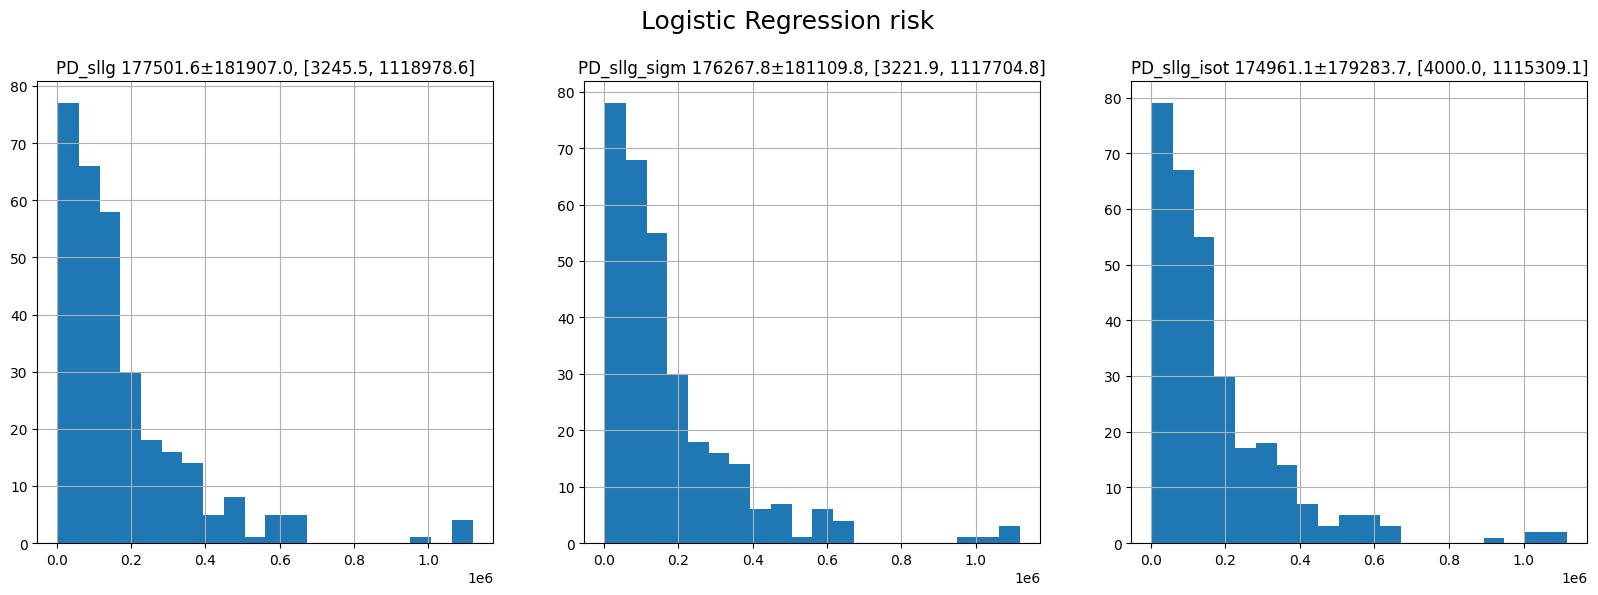

In [34]:
draw_risk_distr(df_of, ['PD_sllg', 'PD_sllg_sigm', 'PD_sllg_isot'], 'Logistic Regression')

In [35]:
df_of.columns

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'PD_slgb', 'PD_sllg', 'PD_slrf', 'PD_lgbm',
       'PD_slgb_sigm', 'PD_slgb_isot', 'PD_sllg_sigm', 'PD_sllg_isot',
       'PD_slrf_sigm', 'PD_slrf_isot', 'PD_lgbm_sigm', 'PD_lgbm_isot'],
      dtype='object')

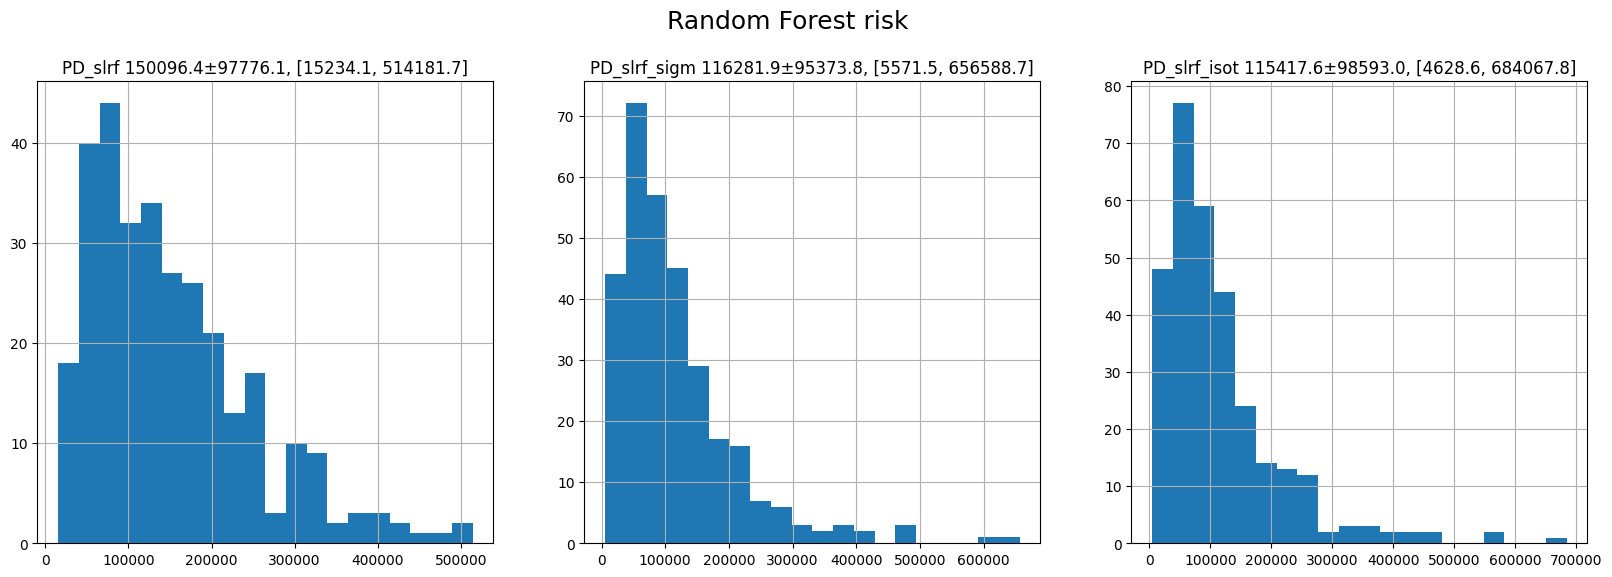

In [36]:
draw_risk_distr(df_of, ['PD_slrf', 'PD_slrf_sigm', 'PD_slrf_isot'], 'Random Forest')

In [ ]:
df_of.columns

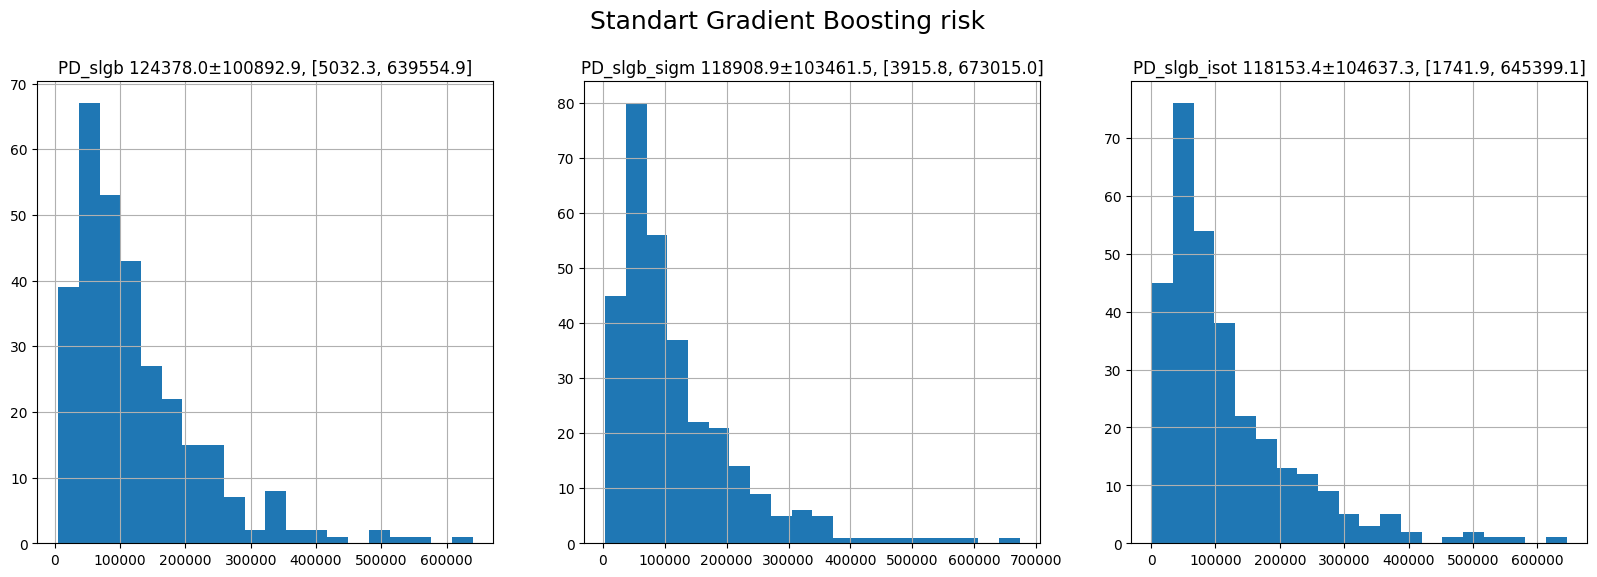

In [37]:
draw_risk_distr(df_of, ['PD_slgb', 'PD_slgb_sigm', 'PD_slgb_isot'], 'Standart Gradient Boosting')

In [38]:
df_of.columns

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'PD_slgb', 'PD_sllg', 'PD_slrf', 'PD_lgbm',
       'PD_slgb_sigm', 'PD_slgb_isot', 'PD_sllg_sigm', 'PD_sllg_isot',
       'PD_slrf_sigm', 'PD_slrf_isot', 'PD_lgbm_sigm', 'PD_lgbm_isot'],
      dtype='object')

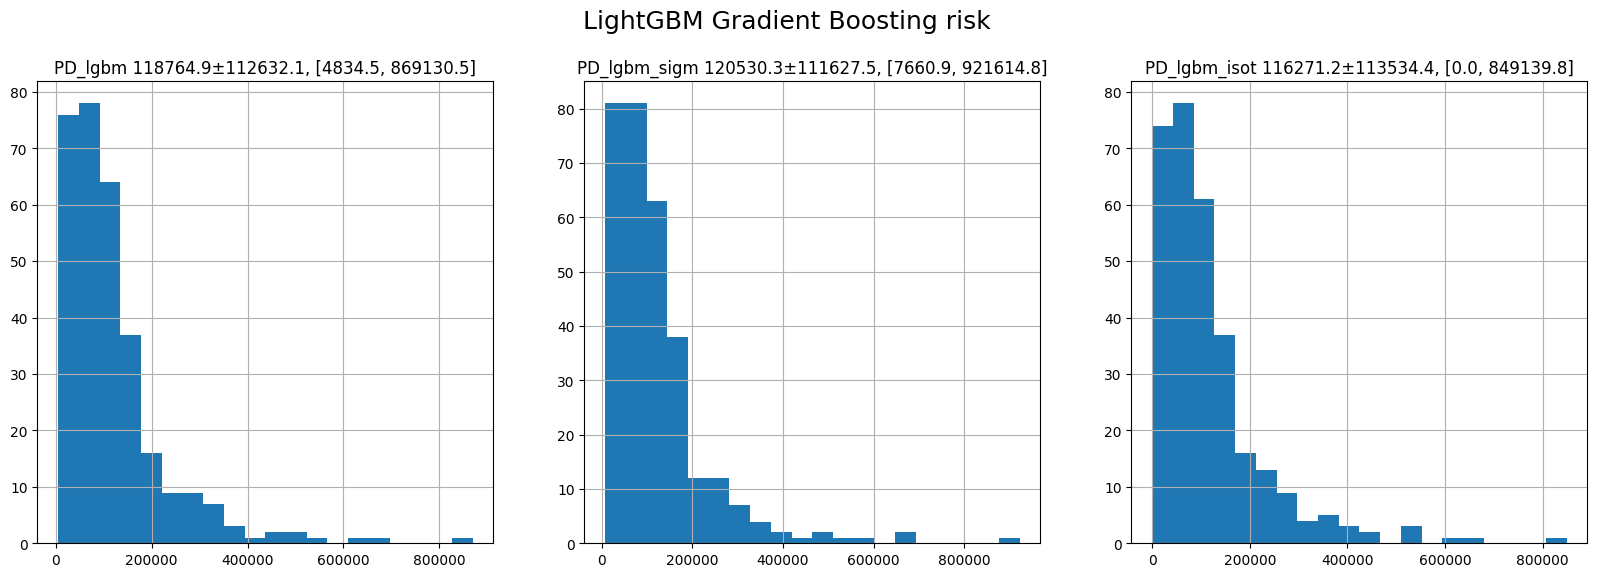

In [40]:
draw_risk_distr(df_of, ['PD_lgbm', 'PD_lgbm_sigm', 'PD_lgbm_isot'], 'LightGBM Gradient Boosting')

In [65]:
pd.set_option('display.max_columns', None)

In [76]:
df_of_aucs = pd.read_csv("various_PD_for_offering_aucs(2).csv", index_col=0)

In [77]:
df_of_aucs

,AMT_CREDIT,AMT_ANNUITY,PD_slgb,PD_sllg,PD_slrf,PD_lgbm,PD_slgb_sigm,PD_slgb_isot,PD_sllg_sigm,PD_sllg_isot,PD_slrf_sigm,PD_slrf_isot,PD_lgbm_sigm,PD_lgbm_isot,PD_slgb_auc,PD_sllg_auc,PD_slrf_auc,PD_lgbm_auc,PD_slgb_sigm_auc,PD_slgb_isot_auc,PD_sllg_sigm_auc,PD_sllg_isot_auc,PD_slrf_sigm_auc,PD_slrf_isot_auc,PD_lgbm_sigm_auc,PD_lgbm_isot_auc
index,,,,,,,,,,,,,,,,,,,,,,,,,,
237427,1288350.0,37800.0,0.385623,0.829638,0.293221,0.674607,0.393141,0.387569,0.827102,0.855422,0.280702,0.315848,0.715345,0.659091,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
284232,206280.0,7906.5,0.251415,0.296336,0.330790,0.250630,0.241942,0.257121,0.293719,0.286503,0.414295,0.429658,0.222348,0.269422,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
163322,402948.0,42444.0,0.375551,0.813012,0.322574,0.456976,0.381663,0.375000,0.810322,0.745763,0.383125,0.404727,0.451602,0.478788,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
1270,1350000.0,37255.5,0.189314,0.148187,0.232928,0.039957,0.174586,0.178723,0.146843,0.135642,0.130622,0.122195,0.088503,0.020690,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
206258,472500.0,33016.5,0.149260,0.276567,0.217079,0.125709,0.132712,0.127986,0.274097,0.286503,0.104670,0.092754,0.130966,0.107890,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184935,1350000.0,51552.0,0.244041,0.063657,0.214738,0.073389,0.233820,0.257121,0.063143,0.058824,0.101248,0.092754,0.103339,0.055092,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
157528,2254500.0,56992.5,0.078983,0.063538,0.218364,0.055964,0.063710,0.062140,0.063024,0.058824,0.106592,0.119712,0.095350,0.055092,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864
56206,573628.5,22878.0,0.309180,0.215917,0.310342,0.236353,0.306399,0.303390,0.213948,0.232785,0.338510,0.363971,0.209950,0.246929,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864


In [ ]:
def run_mlip(df, risk_col):
    ia = np.array(df['AMT_ANNUITY'])
    r = np.array(df[risk_col])

    c = -ia

    A = np.identity(c.shape[0])
    b_l = np.zeros_like(c)
    b_u = np.ones_like(c)
    constraint_1 = LinearConstraint(A=A, lb=b_l, ub=b_u)
    constraint_2 = LinearConstraint(A=r, lb=0, ub=200000)

    integrality = np.ones_like(c)

    res = milp(c=c, constraints=[constraint_1, constraint_2], integrality=integrality)
    print(risk_col, res.message, res.status)
    
    x = res.x
    return (-c@x, r@x, sum(x))


In [120]:
PD_cols = df_of_aucs.columns[2:14]
PD_cols, len(PD_cols)

(Index(['PD_slgb', 'PD_sllg', 'PD_slrf', 'PD_lgbm', 'PD_slgb_sigm',
        'PD_slgb_isot', 'PD_sllg_sigm', 'PD_sllg_isot', 'PD_slrf_sigm',
        'PD_slrf_isot', 'PD_lgbm_sigm', 'PD_lgbm_isot'],
       dtype='object'),
 12)

In [121]:
Risk_cols = []

for col in PD_cols:
    risk_col_name = col+'_Risk'
    df_of_aucs[risk_col_name] = np.round(df_of_aucs['AMT_CREDIT']*np.power(df_of_aucs[col], 1.5), 1)
    Risk_cols.append(risk_col_name)
    
Risk_cols

['PD_slgb_Risk',
 'PD_sllg_Risk',
 'PD_slrf_Risk',
 'PD_lgbm_Risk',
 'PD_slgb_sigm_Risk',
 'PD_slgb_isot_Risk',
 'PD_sllg_sigm_Risk',
 'PD_sllg_isot_Risk',
 'PD_slrf_sigm_Risk',
 'PD_slrf_isot_Risk',
 'PD_lgbm_sigm_Risk',
 'PD_lgbm_isot_Risk']

In [122]:
df_of_aucs

,AMT_CREDIT,AMT_ANNUITY,PD_slgb,PD_sllg,PD_slrf,PD_lgbm,PD_slgb_sigm,PD_slgb_isot,PD_sllg_sigm,PD_sllg_isot,PD_slrf_sigm,PD_slrf_isot,PD_lgbm_sigm,PD_lgbm_isot,PD_slgb_auc,PD_sllg_auc,PD_slrf_auc,PD_lgbm_auc,PD_slgb_sigm_auc,PD_slgb_isot_auc,PD_sllg_sigm_auc,PD_sllg_isot_auc,PD_slrf_sigm_auc,PD_slrf_isot_auc,PD_lgbm_sigm_auc,PD_lgbm_isot_auc,PD_slgb_Risk,PD_sllg_Risk,PD_slrf_Risk,PD_lgbm_Risk,PD_slgb_sigm_Risk,PD_slgb_isot_Risk,PD_sllg_sigm_Risk,PD_sllg_isot_Risk,PD_slrf_sigm_Risk,PD_slrf_isot_Risk,PD_lgbm_sigm_Risk,PD_lgbm_isot_Risk
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
237427,1288350.0,37800.0,0.385623,0.829638,0.293221,0.674607,0.393141,0.387569,0.827102,0.855422,0.280702,0.315848,0.715345,0.659091,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,308516.5,973568.8,204562.8,713855.9,317582.8,310854.1,969107.8,1019305.2,191602.5,228692.3,779484.0,689369.1
284232,206280.0,7906.5,0.251415,0.296336,0.330790,0.250630,0.241942,0.257121,0.293719,0.286503,0.414295,0.429658,0.222348,0.269422,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,26004.3,33276.2,39245.1,25882.5,24548.4,26894.4,32836.3,31633.8,55007.5,58095.3,21627.5,28847.4
163322,402948.0,42444.0,0.375551,0.813012,0.322574,0.456976,0.381663,0.375000,0.810322,0.745763,0.383125,0.404727,0.451602,0.478788,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,92737.0,295388.8,73823.2,124477.1,95009.9,92532.8,293924.1,259507.6,95556.5,103750.9,122287.6,133494.6
1270,1350000.0,37255.5,0.189314,0.148187,0.232928,0.039957,0.174586,0.178723,0.146843,0.135642,0.130622,0.122195,0.088503,0.020690,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,111200.9,77010.1,151763.2,10782.7,98480.4,102001.3,75965.0,67441.3,63731.9,57664.9,35544.3,4017.6
206258,472500.0,33016.5,0.149260,0.276567,0.217079,0.125709,0.132712,0.127986,0.274097,0.286503,0.104670,0.092754,0.130966,0.107890,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,27246.8,68722.9,47789.0,21059.7,22843.9,21634.5,67804.5,72459.6,16000.5,13347.4,22394.4,16744.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184935,1350000.0,51552.0,0.244041,0.063657,0.214738,0.073389,0.233820,0.257121,0.063143,0.058824,0.101248,0.092754,0.103339,0.055092,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,162752.5,21682.4,134337.6,26839.8,152635.7,176010.7,21419.9,19260.2,43492.4,38135.6,44846.6,17456.8
157528,2254500.0,56992.5,0.078983,0.063538,0.218364,0.055964,0.063710,0.062140,0.063024,0.058824,0.106592,0.119712,0.095350,0.055092,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,50043.6,36107.7,230049.5,29847.5,36254.7,34923.0,35670.7,32164.5,78457.7,93380.1,66378.9,29152.8
56206,573628.5,22878.0,0.309180,0.215917,0.310342,0.236353,0.306399,0.303390,0.213948,0.232785,0.338510,0.363971,0.209950,0.246929,0.741659,0.788491,0.692378,0.730028,0.741659,0.743955,0.788491,0.787114,0.692378,0.688399,0.730028,0.731864,98616.3,57552.2,99172.7,65913.2,97288.4,95858.9,56766.5,64426.4,112976.4,125959.3,55182.8,70386.3


In [123]:
df_of_aucs['PD_slgb'+'_auc'].iat[0]

0.7416590143862871

In [127]:
df_offering_result_dict = {"Risk_col": [], "Total_profit": [], "Total_risk": [], "Clients": [], "roc_auc": []}

for col in Risk_cols:
    profit, risk, clients = run_mlip(df_of, col)
    df_offering_result_dict["Risk_col"].append(col)
    df_offering_result_dict["Total_profit"].append(profit)
    df_offering_result_dict["Total_risk"].append(risk)
    df_offering_result_dict["Clients"].append(clients)
    df_offering_result_dict["roc_auc"].append(df_of_aucs[col[:-5]+'_auc'].iat[0])
    
df_offering_result = pd.DataFrame(df_offering_result_dict)
df_offering_result.to_csv("milp_profit_risk_res_aucs.csv")

PD_slgb_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slgb_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slgb_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_sllg_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_slrf_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_sigm_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0
PD_lgbm_isot_Risk Optimization terminated successfully. (HiGHS Status 7: Optimal) 0


In [182]:
df_offering_result["Max_risk - Total_risk"] = 200000 - df_offering_result['Total_risk']
df_offering_result["Expected profit"] = df_offering_result['Total_profit'] - df_offering_result['Total_risk']
df_offering_result

,Risk_col,Total_profit,Total_risk,Clients,roc_auc,Max_risk - Total_risk,Expected profit
9,PD_slrf_isot_Risk,564012.0,199852.1,19.0,0.688399,147.9,364159.9
2,PD_slrf_Risk,220986.0,199863.6,7.0,0.692378,136.4,21122.4
8,PD_slrf_sigm_Risk,569178.0,199219.3,23.0,0.692378,780.7,369958.7
3,PD_lgbm_Risk,716017.5,199997.7,24.0,0.730028,2.3,516019.8
10,PD_lgbm_sigm_Risk,526423.5,198822.4,18.0,0.730028,1177.6,327601.1
11,PD_lgbm_isot_Risk,925222.5,199902.5,30.0,0.731864,97.5,725320.0
0,PD_slgb_Risk,633357.0,199566.0,20.0,0.741659,434.0,433791.0
4,PD_slgb_sigm_Risk,732141.0,199655.0,25.0,0.741659,345.0,532486.0
5,PD_slgb_isot_Risk,928129.5,199790.5,30.0,0.743955,209.5,728339.0
7,PD_sllg_isot_Risk,551101.5,199380.1,26.0,0.787114,619.9,351721.4


In [129]:
df_offering_result.sort_values(by=['roc_auc'], inplace=True)

In [144]:
df_offering_result['Risk_col']

9     PD_slrf_isot_Risk
2          PD_slrf_Risk
8     PD_slrf_sigm_Risk
3          PD_lgbm_Risk
10    PD_lgbm_sigm_Risk
11    PD_lgbm_isot_Risk
0          PD_slgb_Risk
4     PD_slgb_sigm_Risk
5     PD_slgb_isot_Risk
7     PD_sllg_isot_Risk
1          PD_sllg_Risk
6     PD_sllg_sigm_Risk
Name: Risk_col, dtype: object

In [151]:
col2model = {
    "PD_slgb_Risk": "GB",
    "PD_sllg_Risk": "LogReg",
    "PD_slrf_Risk": "RF",
    "PD_lgbm_Risk": "LGBM",
    
    "PD_slgb_sigm_Risk": "GB sigmoid",
    "PD_sllg_sigm_Risk": "LogReg sigmoid",
    "PD_slrf_sigm_Risk": "RF sigmoid",
    "PD_lgbm_sigm_Risk": "LGBM sigmoid",
    
    "PD_slgb_isot_Risk": "GB isotonic",
    "PD_sllg_isot_Risk": "LogReg isotonic",
    "PD_slrf_isot_Risk": "RF isotonic",
    "PD_lgbm_isot_Risk": "LGBM isotonic",
    
}

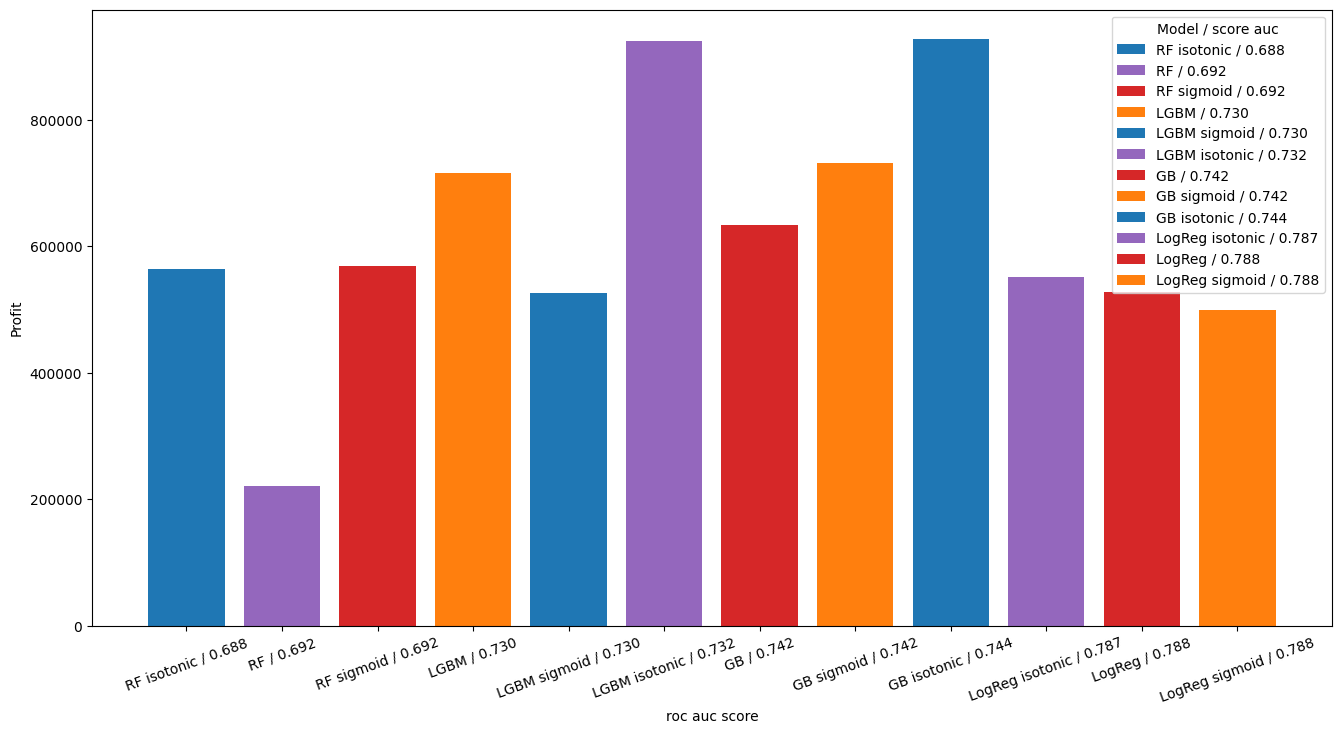

In [176]:
plt.figure(figsize=(16,8))

x = df_offering_result['Risk_col'].apply(lambda x: col2model[x] + f" / {df_offering_result[df_offering_result['Risk_col']==x]['roc_auc'].values[0]:.3f}")

bar_labels = x
bar_colors = ['tab:blue', 'tab:purple', 'tab:red', 'tab:orange'] * 3

plt.bar(
    x, df_offering_result['Total_profit'],
    width=0.8, label=bar_labels, color=bar_colors
)

plt.xticks(rotation=20)
plt.legend(title='Model / score auc')
plt.ylabel("Profit")
plt.xlabel("roc auc score")
plt.show()

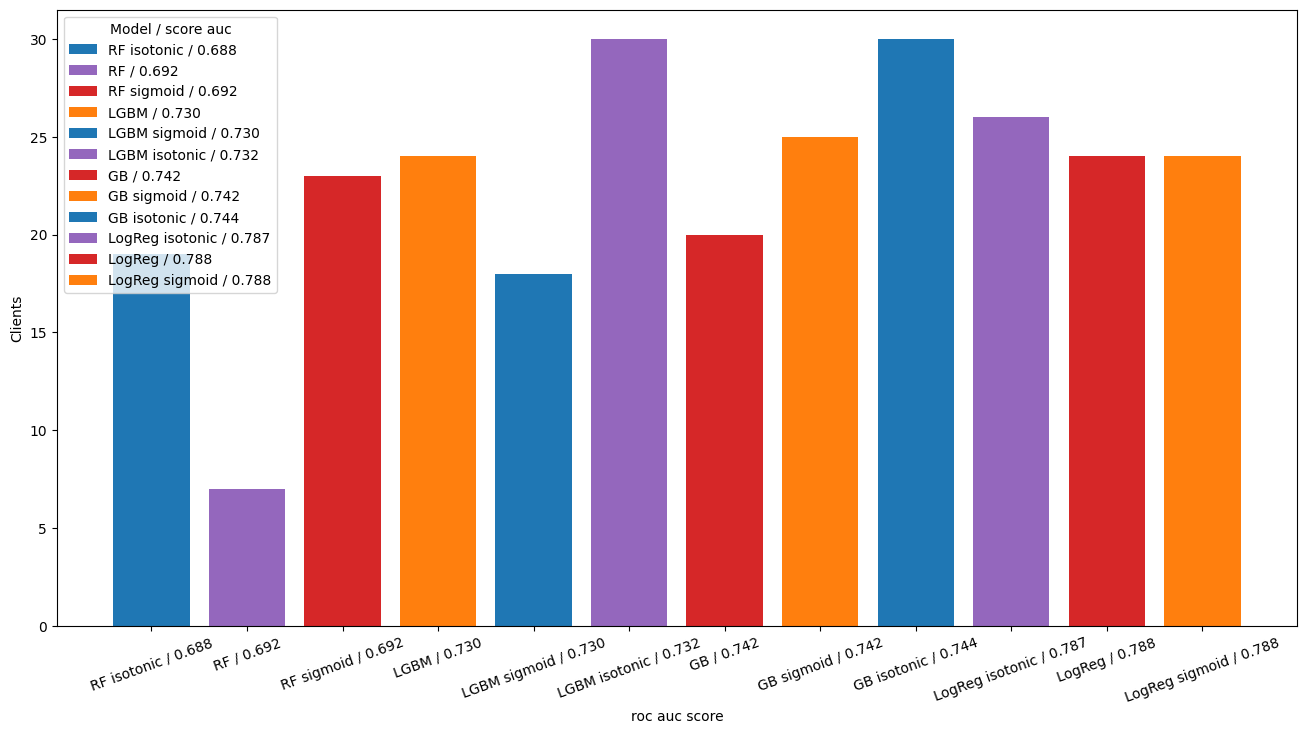

In [178]:
plt.figure(figsize=(16,8))

x = df_offering_result['Risk_col'].apply(lambda x: col2model[x] + f" / {df_offering_result[df_offering_result['Risk_col']==x]['roc_auc'].values[0]:.3f}")

bar_labels = x
bar_colors = ['tab:blue', 'tab:purple', 'tab:red', 'tab:orange'] * 3

plt.bar(
    x, df_offering_result['Clients'],
    width=0.8, label=bar_labels, color=bar_colors
)

plt.xticks(rotation=20)
plt.legend(title='Model / score auc')
plt.ylabel("Clients")
plt.xlabel("roc auc score")
plt.show()

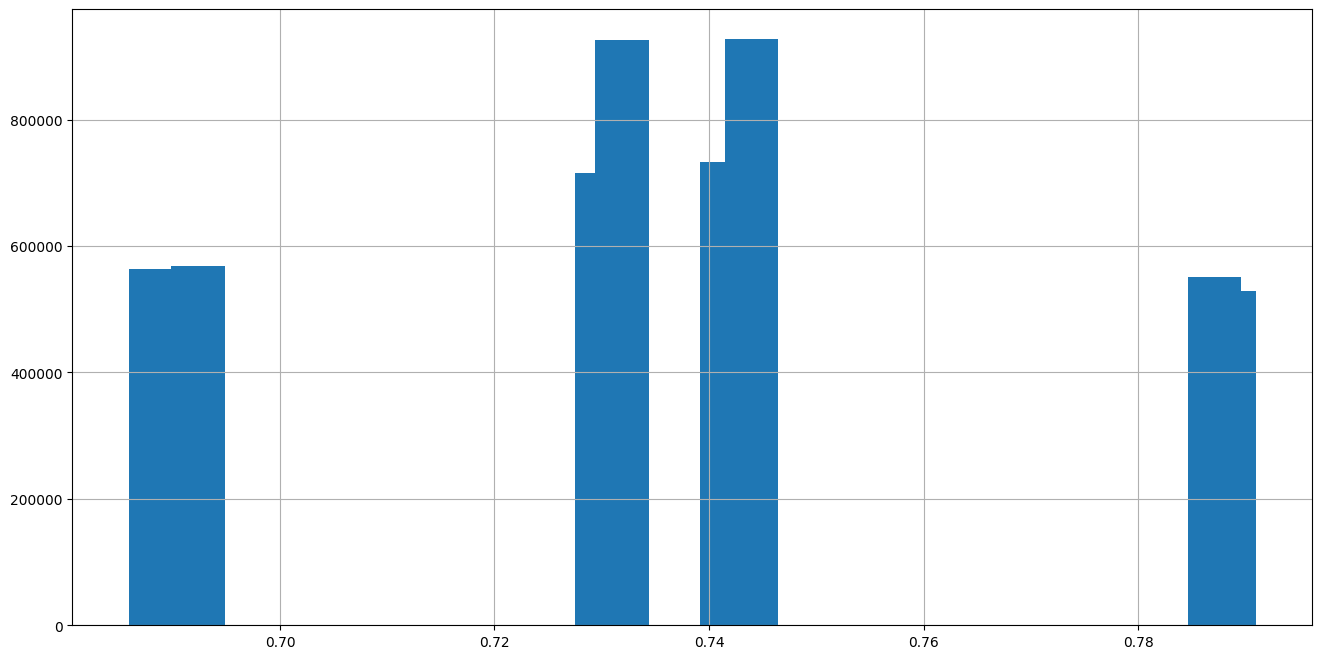

In [133]:
plt.figure(figsize=(16,8))

plt.bar(df_offering_result['roc_auc'].values, df_offering_result['Total_profit'].values, width=0.005)

plt.grid()
plt.show()

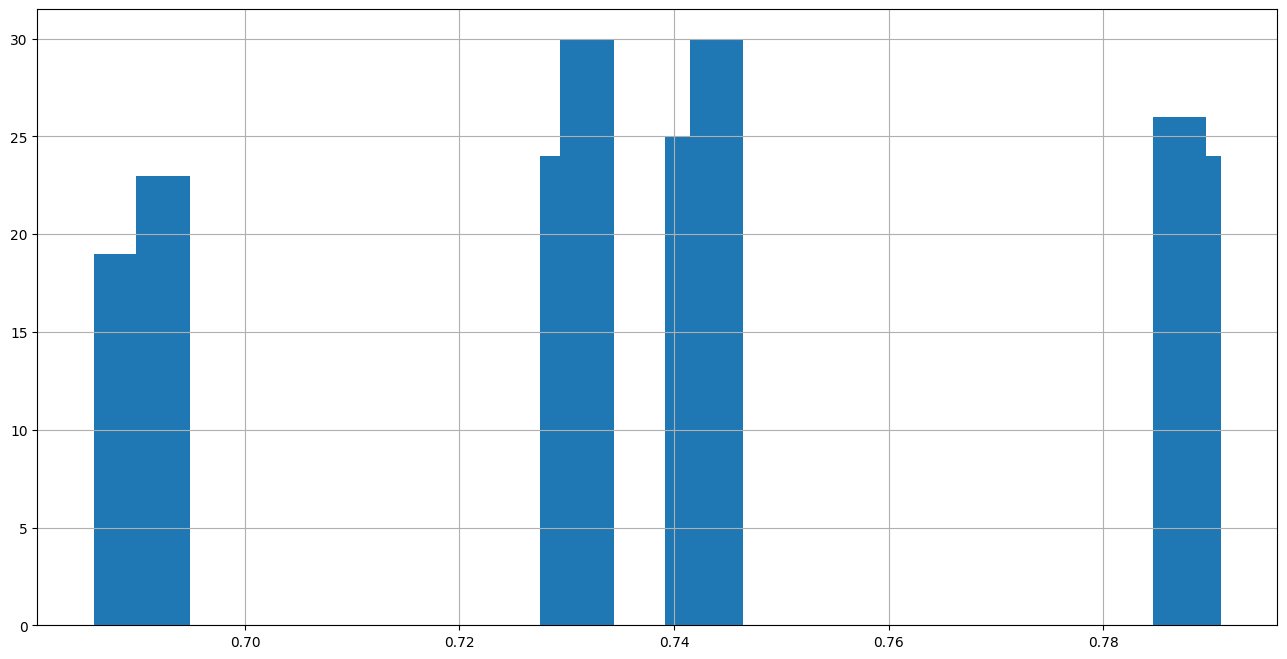

In [135]:
plt.figure(figsize=(16,8))

plt.bar(df_offering_result['roc_auc'].values, df_offering_result['Clients'].values, width=0.005)

plt.grid()
plt.show()